

> We are the SSJ team and this is our work about natural language processing.

---

In [2]:
import io
import pandas as pd
from google.colab import files
import re

## 0. Loading Data

We start by loading the data file that contains the tweets with which the study will work. The file format to upload is CSV.

For this purpose, we use some commands provided by Google Colab itself to access files on our computer.



In [3]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),sep=',')

df

Saving labeled_data.csv to labeled_data.csv
User uploaded file "labeled_data.csv" with length 2546446 bytes


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


3 classes: 0 --> hate speech, 1 --> offensive language, 2 --> neither

# 1. Preprocessing

##Remove unuseful data

In [6]:
pattern = "\"#$%&'()*+, -./:;<=>?@[\]^_`{|}~" # Es la variable string.puntuation sin el caracter ! porque lo vemos importante 
def cleanUnusefulData(sentence):
  sentence = sentence.translate(str.maketrans('', '', pattern))
  return sentence
def removeUnusefulExclamation(sentence):
  if sentence[0] == '!':
    sentence = removeUnusefulExclamation(sentence[1:])
  else:
    return sentence
  return sentence

print(cleanUnusefulData("!!!!!!!!!!!!! RT @ShenikaRoberts: The shit yo*"))

!!!!!!!!!!!!!RTShenikaRobertsTheshityo


In [7]:
for t in range(0,len(df)):
  tweet = df.iloc[t]['tweet']
  tweet = removeUnusefulExclamation(tweet)
  df.loc[t,'tweet'] = tweet

##Replace emoticons


Lectura de fichero emoticonos.

In [10]:
dict_emoticons = {}
with open('emoticons.txt') as f:
    for linea in f:
      info = linea.split(",")
      #emoticon_code = "&#"+str(info[1])+";"
      emoticon_code = info[0]
      emoticon_word = info[2]
      dict_emoticons[emoticon_code] = emoticon_word[:len(emoticon_word)-1]
print(dict_emoticons)

def replaceEmoticon(word):
  #p = re.compile("&#x[0-9A-Z]+;")
  #s = re.compile("&#128073;&#128076") #sex
  #m = p.findall(word)
  #print(word)
  if word in dict_emoticons:
    word = word.replace(str(word),dict_emoticons[word])
  return word

{'😀': 'smile', '😁': 'smile', '😂': 'laugh', '😃': 'smile', '😄': 'smile', '😆': 'smile', '😉': 'wink', '😊': 'smile', '😒': 'unamused', '😕': 'confused', '😗': 'kiss', '😘': 'kiss', '😙': 'kiss', '😚': 'kiss', '😞': 'dissapointed', '😟': 'worried', '😠': 'angry', '😡': 'angry', '😢': 'sad', '😨': 'frightened', '😪': 'sleepy', '😫': 'tired', '😭': 'sad', '😮': 'surprised', '😯': 'surprised', '😱': 'frightened', '😲': 'astonished', '😳': 'flushed', '😴': 'sleepy', '😵': 'confused', '😶': 'quiet', '🤐': 'quiet', '🤒': 'ill', '🤔': 'thoughtful', '🤡': 'clown', '🤢': 'sucks', '🤣': 'laugh', '\U0001f92c': 'angry', '\U0001f92e': 'sucks', '\U0001f92f': 'astonished'}


##Remove contractions

In [11]:
dict_contractions = {'aren\'t':'are not', 'can\'t':'can not', 'couldn\'t':'could not', 'didn\'t':'did not', 'don\'t':'do not', 'doesn\'t':'does not', 'hadn\'t':'had not',
                       'haven\'t':'have not', 'he\'s':'he is', 'he\'ll':'he will', 'he\'d':'he would', 'here\'s':'here is', 'i\'m':'i am', 'i\'ve':'i have', 'i\'ll':'i will',
                       'i\'d':'i would', 'isn\'t':'is not','it\'s':'it is', 'it\'ll':'it will', 'mustn\'t':'must not', 'she\'s':'she is', 'she\'ll':'she will', 'she\'d':'she would',
                       'shouldn\'t':'should not', 'that\'s':'that is', 'there\'s':'there is', 'they\'re':'they are', 'they\'ve':'they have', 'they\'ll':'they will', 'they\'d':'they would',
                       'they\'d':'they had', 'wasn\'t':'was not', 'we\'re':'we are', 'we\'re':'we are', 'we\'ve':'we have', 'we\'ll':'we will', 'we\'d':'we would', 'weren\'t':'were not', 'what\'s':'what is',
                       'where\'s':'where is', 'who\'s':'who is', 'who\'ll':'who will', 'won\'t':'will not', 'wouldn\'t':'would not', 'you\'re': 'you are', 'you\'ve': 'you have', 
                       'you\'ll':'you will', 'you\'d':'you would', 'y\'all': 'you all', 'could\'ve': 'could have', 'hasn\'t': 'has not', 'let\'s': 'let us'}

def remove_contractions(word):
  return word.replace(word,dict_contractions[word])
  
def is_remove_contractions(word):
  if word in dict_contractions:
    return True    
  else:
    return False


Now the emoticons that we have decided has been changed for text representing the meaning of the emoticon.


## Executing preprocessing

In [67]:
# We create a new dataframe to save result in different columns
df_result = pd.DataFrame()

In [68]:
!pip install tweet-preprocessor

import preprocessor as p
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

p.set_options(p.OPT.EMOJI, p.OPT.URL,p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.ESCAPE_CHAR, p.OPT.RESERVED, p.OPT.NUMBER)
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
# each sentence of tweet
sentences = []
for tweet in df['tweet']:
    word_repeat= ""
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      
      if word_repeat != word:

        # Cambiar emoticono por texto
        token = replaceEmoticon(word)
        
        # limpiar hastag y menciones
        token = p.clean(token)

        # Cambiar primera letra mayuscula solo si la siguiente es minuscula
        if not token.isupper():
          token = token.lower()
        if token.isupper() and len(token)==1:
          token = token.lower()

        # Cambiar contraciones (you're) por palabra entera
        if is_remove_contractions(token):
          token = remove_contractions(token)
          token = token.split(" ")
          list_token.append(token[0])
          list_token.append(token[1])
        else:
          # limpiar información inútil (",_,...)
          token = cleanUnusefulData(token)
          if(token is not ""):
            list_token.append(token)
        word_repeat = word
      
    sentences.append(list_token)
  #print(result)

df_result['preprocessing_without_emoticons'] = sentences
df_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,preprocessing_without_emoticons
0,"[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, you, ever, fuck, a, bitch, and, she,..."
3,"[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t..."
...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ..."
24779,"[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitches, tellin, you, lies]"


In [69]:
!pip install tweet-preprocessor

import preprocessor as p
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

p.set_options(p.OPT.URL,p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.SMILEY, p.OPT.ESCAPE_CHAR, p.OPT.RESERVED, p.OPT.NUMBER)

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
# each sentence of tweet
sentences = []
for tweet in df['tweet']:
    word_repeat= ""
    result = tknzr.tokenize(tweet)
    list_token = []
    for word in result:
      
      if word_repeat != word:
        # limpiar hastag y menciones
        token = p.clean(word)

        # Cambiar primera letra mayuscula solo si la siguiente es minuscula
        if not token.isupper():
          token = token.lower()
        if token.isupper() and len(token)==1:
          token = token.lower()

        # Cambiar contraciones (you're) por palabra entera
        if is_remove_contractions(token):
          token = remove_contractions(token)
          token = token.split(" ")
          list_token.append(token[0])
          list_token.append(token[1])
        else:
          # limpiar información inútil (",_,...)
          token = cleanUnusefulData(token)
          if(token is not ""):
            list_token.append(token)
        word_repeat = word
    
    sentences.append(list_token)
  #print(result)

df_result['preprocessing_with_emoticons'] = sentences
df_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[as, a, woman, you, should, not, complain, abo...","[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,...","[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, you, ever, fuck, a, bitch, and, she,...","[dawg, !, you, ever, fuck, a, bitch, and, she,..."
3,"[she, look, like, a, tranny]","[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t...","[the, shit, you, hear, about, me, might, be, t..."
...,...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ...","[yous, a, muthaf, in, lie, “, right, !, his, T..."
24779,"[you, have, gone, and, broke, the, wrong, hear...","[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitches, tellin, you, lies]","[youu, got, wild, bitches, tellin, you, lies]"


In [15]:
#Comprobacion emoticonos
print(df_result['preprocessing_with_emoticons'][5])
print(df_result['preprocessing_without_emoticons'][5])
#Comprobacion division en dos vectores should't
print(df_result['preprocessing_without_emoticons'][0][5:10])

['the', 'shit', 'just', 'blows', 'me', 'claim', 'you', 'so', 'faithful', 'and', 'down', 'for', 'somebody', 'but', 'still', 'fucking', 'with', 'hoes', '!', '😂']
['the', 'shit', 'just', 'blows', 'me', 'claim', 'you', 'so', 'faithful', 'and', 'down', 'for', 'somebody', 'but', 'still', 'fucking', 'with', 'hoes', '!', 'laugh']
['not', 'complain', 'about', 'cleaning', 'up']


In [16]:
for sentence in range(0,len(df_result)):
  print(df_result['preprocessing_without_emoticons'][sentence])

Se han truncado las últimas 5000 líneas del flujo de salida.
['damn', 'i', 'hate', 'a', 'bitch', 'that', 'like', 'to', 'argue', 'and', 'shit']
['my', 'nigga', 'really', 'tried', 'to', 'save', 'his', 'bitch', 'lol']
['mothers', 'day', 'is', 'n', 'mins', 'you', 'all', 'bitches', 'picked', 'you', 'all', 'kids', 'up', 'from', 'yo', 'mama', 'house', 'so', 'u', 'can', 'have', 'hrs', 'of', 'custody', 'n', 'instagram', 'p']
['i', 'want', 'a', 'crazy', 'bitch', 'they', 'be', 'loyal', 'af']
['ima', 'eat', 'that', 'pussy', 'all', 'filthy']
['you', 'all', 'hoes', 'so', 'annoying', 'unamused']
['brought', 'to', 'you', 'by', 'bad', 'bitches', 'and', 'good', 'weed']
['damn', 'i', 'got', 'bitches', 'kanye', 'voice']
['i', 'can', 'not', 'be', 'worried', 'bout', 'no', 'bitch', 'cause', 'that', 'bitch', 'could', 'be', 'somewhere', 'sucking', 'dick']
['i', 'will', 'not', 'love', 'you', 'i', 'can', 'not', 'love', 'you', 'unless', 'that', 'pussy', 'got', 'some', 'super', 'powers']
['it', 'is', 'crazy', 'if'

 [los metodos estan explicados en esta pagina web - How to Write a Spelling Corrector](https://norvig.com/spell-correct.html)

In [17]:
from collections import Counter

def words(text):
  aux =""
  aux = re.findall(r'\w+', text)
  return aux

WORDS_COUNTER = []
for sentence in range(0,len(df_result)):
  WORDS = []
  cell = df_result.iloc[sentence]['preprocessing_without_emoticons']
  for i in cell:
    w = words(i)
    WORDS_COUNTER += w
    if w:
      WORDS.append(w[0])
  df_result.loc[sentence]['preprocessing_without_emoticons'] = WORDS
    
WORDS_COUNTER = Counter(WORDS_COUNTER)

def P(word, N=sum(WORDS_COUNTER.values())): 
    "Probability of `word`."
    return WORDS_COUNTER[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS_COUNTER)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
correction('yous')

'yous'

Cantidad de palabras diferentes y numero de palabras totales. Además se muestra el TOP 10 de la palabra más usada

In [18]:
print("We can see that there are "+ str(len(WORDS_COUNTER))+ " distinct words, which together appear "+ str(sum(WORDS_COUNTER.values())) +" times.")
print("Words more used: ")
WORDS_COUNTER.most_common(10)

We can see that there are 20287 distinct words, which together appear 319098 times.
Words more used: 


[('i', 9730),
 ('a', 9506),
 ('bitch', 8270),
 ('the', 7140),
 ('you', 7138),
 ('to', 5321),
 ('is', 4715),
 ('that', 4003),
 ('not', 3980),
 ('and', 3967)]

Se han almacenado todas las palabras existentes y ha contado cuantas aparecen repetidas.

In [19]:
WORDS_COUNTER

Counter({'as': 657,
         'a': 9506,
         'woman': 99,
         'you': 7138,
         'should': 245,
         'not': 3980,
         'complain': 28,
         'about': 919,
         'cleaning': 6,
         'up': 1504,
         'your': 1530,
         'house': 131,
         'man': 517,
         'always': 279,
         'take': 293,
         'the': 7140,
         'trash': 1149,
         'out': 1065,
         'boy': 191,
         'dats': 24,
         'cold': 62,
         'tyga': 16,
         'dwn': 2,
         'bad': 569,
         'for': 2115,
         'cuffin': 10,
         'dat': 288,
         'hoe': 1916,
         'in': 3051,
         'st': 62,
         'place': 66,
         'dawg': 42,
         'ever': 256,
         'fuck': 1392,
         'bitch': 8270,
         'and': 3967,
         'she': 1343,
         'start': 144,
         'to': 5321,
         'cry': 59,
         'be': 2370,
         'confused': 75,
         'shit': 1261,
         'look': 473,
         'like': 2766,
         '

In [20]:
for i in range(0,len(df_result)): #No creo que haya hecho mucho...
  sentence = df_result.iloc[i]['preprocessing_with_emoticons']
  for word in sentence:
    word = correction(word)

In [21]:
df_result

,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[as, a, woman, you, should, not, complain, abo...","[as, a, woman, you, should, not, complain, abo..."
1,"[boy, dats, cold, tyga, dwn, bad, for, cuffin,...","[boy, dats, cold, tyga, dwn, bad, for, cuffin,..."
2,"[dawg, !, you, ever, fuck, a, bitch, and, she,...","[dawg, !, you, ever, fuck, a, bitch, and, she,..."
3,"[she, look, like, a, tranny]","[she, look, like, a, tranny]"
4,"[the, shit, you, hear, about, me, might, be, t...","[the, shit, you, hear, about, me, might, be, t..."
...,...,...
24778,"[yous, a, muthaf, in, lie, right, !, his, TL, ...","[yous, a, muthaf, in, lie, “, right, !, his, T..."
24779,"[you, have, gone, and, broke, the, wrong, hear...","[you, have, gone, and, broke, the, wrong, hear..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitches, tellin, you, lies]","[youu, got, wild, bitches, tellin, you, lies]"


In [22]:
for i in range(0,len(df_result)):
  sentence = df_result.iloc[i]['preprocessing_without_emoticons']
  for word in sentence:
    word = correction(word)

##Remove repeated words

In [23]:
###Se puede hacer en el otro metodo, pero lo dejo aqui para que sea más "visual"
for i in range(0,len(df_result)):
  sentence = df_result.iloc[i]['preprocessing_without_emoticons']
  for x in range(0,len(sentence)-2):
    previous_word = sentence[x]
    if previous_word == sentence[x+1]:
      sentence[x+1] = ""

In [24]:
for i in range(0,len(df_result)):
  sentence = df_result.iloc[i]['preprocessing_with_emoticons']
  for x in range(0,len(sentence)-2):
    previous_word = sentence[x]
    if previous_word == sentence[x+1]:
      sentence[x+1] = ""

##Stop words

In [71]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stops = set(stopwords.words('english'))
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([word for word in df_result['preprocessing_with_emoticons'][tweet] if word not in english_stops]) 
  clear_sent_not_emoticon.append([word for word in df_result['preprocessing_without_emoticons'][tweet] if word not in english_stops]) 

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dats, cold, tyga, dwn, bad, cuffin, dat,...","[boy, dats, cold, tyga, dwn, bad, cuffin, dat,..."
2,"[dawg, !, ever, fuck, bitch, start, cry, confu...","[dawg, !, ever, fuck, bitch, start, cry, confu..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, “, right, !, TL, trash, …,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitches, tellin, lies]","[youu, got, wild, bitches, tellin, lies]"


In [74]:
df_result.iloc[1597]

preprocessing_without_emoticons    [bos, as, bitch, bitch, bitch, bitch, bitch, b...
preprocessing_with_emoticons       [“, bos, as, bitch, bitch, bitch, bitch, bitch...
Name: 1597, dtype: object

## Lemmatize all terms

In [73]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
clear_sent_emoticon = []
clear_sent_not_emoticon = []
for tweet in range(0,len(df_result['preprocessing_with_emoticons'])):
  clear_sent_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_with_emoticons'][tweet]])
  clear_sent_not_emoticon.append([lemmatizer.lemmatize(word) for word in df_result['preprocessing_without_emoticons'][tweet]])

df_result['preprocessing_with_emoticons'] = clear_sent_emoticon
df_result['preprocessing_without_emoticons'] = clear_sent_not_emoticon
df_result

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,preprocessing_without_emoticons,preprocessing_with_emoticons
0,"[woman, complain, cleaning, house, man, always...","[woman, complain, cleaning, house, man, always..."
1,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...","[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ..."
2,"[dawg, !, ever, fuck, bitch, start, cry, confu...","[dawg, !, ever, fuck, bitch, start, cry, confu..."
3,"[look, like, tranny]","[look, like, tranny]"
4,"[shit, hear, might, true, might, faker, bitch,...","[shit, hear, might, true, might, faker, bitch,..."
...,...,...
24778,"[yous, muthaf, lie, right, !, TL, trash, mine,...","[yous, muthaf, lie, “, right, !, TL, trash, …,..."
24779,"[gone, broke, wrong, heart, baby, drove, redne...","[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, !, dat, nigguh, like...","[young, buck, wanna, eat, !, dat, nigguh, like..."
24781,"[youu, got, wild, bitch, tellin, lie]","[youu, got, wild, bitch, tellin, lie]"


# Vectorization

## Destokenizador

To do the vectorization, we have chosen to put back all the tokens that make a sentence. We think that this will make the development of this process easier.

In [27]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

tweets_detokenize = []

for i in range(0,len(df_result)):
  tweets_detokenize.append( TreebankWordDetokenizer().detokenize(df_result.iloc[i]['preprocessing_without_emoticons']))

print(len(tweets_detokenize))
tweets_detokenize



24783


['woman complain cleaning house man always take trash',
 'boy dat cold tyga dwn bad cuffin dat hoe st place!',
 'dawg! ever fuck bitch start cry confused shit',
 'look like tranny',
 'shit hear might true might faker bitch told ya',
 'shit blow claim faithful somebody still fucking hoe! laugh',
 'sit HATE another bitch got much shit going!',
 'cause tired big bitch coming u skinny girl!',
 'might get ya bitch back thats',
 'hobby include fighting mariam bitch',
 'keeks bitch curve everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go IG',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitch get cut everyday b',
 'black bottle bad bitch',
 'broke bitch cant tell nothing',
 'cancel bitch like nino',
 'cant see hoe wont change',
 'fuck bitch dont even suck dick laugh kermit video bout fuck IG',
 'got ya bitch tip toeing hardwood floor laugh',
 'pussy lip like heaven door',
 'hoe hitting',
 '

In [28]:
df_result['detokenization'] = tweets_detokenize

In [29]:
df_result.iloc[0]['detokenization']

'woman complain cleaning house man always take trash'

## TFIDF

In order to start using TFIDF, we will first have to create a CountVectorizer to count the number of words (term frequency)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

X = vectorizer.fit_transform(tweets_detokenize)

#X_tokens = countvectorizer.get_features_names()

print(X.shape)
print(X.toarray())
print(vectorizer.vocabulary_)
print(X[0])

(24783, 17202)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'woman': 16812, 'complain': 3038, 'cleaning': 2808, 'house': 7173, 'man': 9198, 'always': 416, 'take': 14807, 'trash': 15486, 'boy': 1801, 'dat': 3673, 'cold': 2934, 'tyga': 15736, 'dwn': 4539, 'bad': 994, 'cuffin': 3496, 'hoe': 6995, 'st': 14235, 'place': 11346, 'dawg': 3688, 'ever': 4949, 'fuck': 5776, 'bitch': 1491, 'start': 14294, 'cry': 3468, 'confused': 3114, 'shit': 13429, 'look': 8926, 'like': 8755, 'tranny': 15461, 'hear': 6769, 'might': 9588, 'true': 15597, 'faker': 5137, 'told': 15335, 'ya': 16952, 'blow': 1625, 'claim': 2775, 'faithful': 5132, 'somebody': 13977, 'still': 14385, 'fucking': 5792, 'laugh': 8531, 'sit': 13631, 'hate': 6698, 'another': 546, 'got': 6258, 'much': 9915, 'going': 6201, 'cause': 2382, 'tired': 15277, 'big': 1429, 'coming': 2994, 'skinny': 13674, 'girl': 6115, 'get': 6052, 'back': 971, 'thats': 15051, 'hobby': 6991, '

Cosas que poner antes del codigo que he encontrado en el interne

With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. It’s really simple.

With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

In [31]:
# TF-IDF
# https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
# https://es.ryte.com/wiki/TF*IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)

X = vectorizer.fit_transform(tweets_detokenize)

tfidf = X.toarray()

print(X.shape)
print(tfidf)
print(vectorizer.vocabulary_)
print(X[0])


(24783, 17202)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{'woman': 16812, 'complain': 3038, 'cleaning': 2808, 'house': 7173, 'man': 9198, 'always': 416, 'take': 14807, 'trash': 15486, 'boy': 1801, 'dat': 3673, 'cold': 2934, 'tyga': 15736, 'dwn': 4539, 'bad': 994, 'cuffin': 3496, 'hoe': 6995, 'st': 14235, 'place': 11346, 'dawg': 3688, 'ever': 4949, 'fuck': 5776, 'bitch': 1491, 'start': 14294, 'cry': 3468, 'confused': 3114, 'shit': 13429, 'look': 8926, 'like': 8755, 'tranny': 15461, 'hear': 6769, 'might': 9588, 'true': 15597, 'faker': 5137, 'told': 15335, 'ya': 16952, 'blow': 1625, 'claim': 2775, 'faithful': 5132, 'somebody': 13977, 'still': 14385, 'fucking': 5792, 'laugh': 8531, 'sit': 13631, 'hate': 6698, 'another': 546, 'got': 6258, 'much': 9915, 'going': 6201, 'cause': 2382, 'tired': 15277, 'big': 1429, 'coming': 2994, 'skinny': 13674, 'girl': 6115, 'get': 6052, 'back': 9

In [53]:
listaTFIDF = []

for i in range(0,X.shape[0]):
  listaTFIDF.append(X[i])

df_vectorization = pd.DataFrame()

df_vectorization['TFIDF'] = listaTFIDF

hola = df_vectorization.iloc[7]['TFIDF'] # PRIMER TWEET

#print(hola[0].get_shape())

print(hola.getnnz(axis=0))

#print(hola[0][16878])


[0 0 0 ... 0 0 0]


## TFIDF + N-grams

In [ ]:
df_result.to_csv('df_result.csv')

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=1)
"""f=open("kk.txt","w")
f.write("machacando\n")
f.close()"""

X = vectorizer.fit_transform(tweets_detokenize)

tfidf = X.toarray()
print(tfidf)
print(vectorizer.vocabulary_)
print (X.shape)

## TFIDF + N-grams + POS tagging

In [76]:
# Part of Speech Tagging
import nltk
nltk.download('averaged_perceptron_tagger')

listaTweets = []
contador = 0
for tweet in df_result['preprocessing_without_emoticons']:
  tags = []
  #if '' in tweet:
   # tweet.remove('')
  #for word in tweet: 
  #tags.append(nltk.pos_tag(word))
  print(tweet)
  listaTweets.append(nltk.pos_tag(tweet))
  contador = contador + 1
  print(contador)
    #listaTweets.append(tags)
  
#df_result = listaTweets
df_result['POS'] = listaTweets
df_result['POS']

Se han truncado las últimas 5000 líneas del flujo de salida.
['tryna', 'get', 'home', 'like', 'base', 'base', 'base', 'closet', 'looking', 'like', 'planet', 'bathing', 'ape']
22284
['tryna', 'save', 'hoe', 'wanna', 'saved', 'nope']
22285
['tuna', 'good', 'rest', 'trash', 'can', 'spam', 'struggle', 'food', 'HAS', 'TO', 'BE', 'meat', 'tuna', 'included']
22286
['tupac', 'could', 'fuck', 'bitch', 'world', 'nigga', 'cry', 'pic', 'took', 'FOR', 'BITCHES']
22287
['turk', 'hoe']
22288
['turn', 'fuck', 'nigguh', 'rebound']
22289
['turn', 'hoe', 'house', 'wife', 'bet']
22290
['turn', 'bitch']
22291
['turn', 'magic', 'colored', 'light']
22292
['turn', 'entire', 'fuck', 'hoe', '!']
22293
['turnup', 'hoe']
22294
['twatch', 'sound', 'like', 'twat']
22295
['tweakin', 'hoe']
22296
['tweekin', 'hoe']
22297
['twice', 'divorced', 'teabagger', 'florida', 'attorney', 'general', 'say', 'marriage', 'reserved', 'stable', 'enduring', 'family', 'unit']
22298
['twice', 'divorced', 'teabagger', 'florida', 'attorn

0        [(woman, NN), (complain, VB), (cleaning, NN), ...
1        [(boy, NN), (dat, NN), (cold, JJ), (tyga, NN),...
2        [(dawg, NN), (!, .), (ever, RB), (fuck, JJ), (...
3                   [(look, NN), (like, IN), (tranny, NN)]
4        [(shit, NNS), (hear, JJ), (might, MD), (true, ...
                               ...                        
24778    [(yous, JJ), (muthaf, NNS), (lie, RB), (right,...
24779    [(gone, VBN), (broke, VBD), (wrong, JJ), (hear...
24780    [(young, JJ), (buck, NN), (wanna, JJ), (eat, N...
24781    [(youu, NN), (got, VBD), (wild, JJ), (bitch, N...
24782    [(ruffled, VBN), (ntac, RB), (eileen, JJ), (da...
Name: POS, Length: 24783, dtype: object

In [78]:
# filter nouns
nouns = []
for tweet in df_result['POS']:
    nouns.append([word[0] for word in tweet if word[1] == 'NN'])
nouns

[['woman', 'cleaning', 'house', 'man', 'trash'],
 ['boy', 'dat', 'tyga', 'dwn', 'cuffin', 'dat', 'hoe', 'place'],
 ['dawg', 'start', 'cry', 'shit'],
 ['look', 'tranny'],
 ['bitch', 'ya'],
 ['blow', 'claim', 'faithful', 'somebody', 'hoe', 'laugh'],
 ['sit', 'bitch', 'shit'],
 ['cause', 'bitch', 'girl'],
 [],
 ['hobby', 'bitch'],
 ['curve', 'everyone', 'lol', 'conversation', 'smh'],
 ['murda', 'gang', 'bitch', 'gang', 'land'],
 ['hoe', 'yea'],
 ['thing'],
 ['bitch', 'get'],
 ['bitch', 'nigga', 'miss'],
 ['bitch', 'plz'],
 ['bitch', 'love'],
 ['bitch', 'get', 'b'],
 ['bottle', 'bitch'],
 ['bitch', 'cant', 'tell', 'nothing'],
 ['bitch', 'nino'],
 ['see', 'change'],
 ['bitch', 'dont', 'laugh', 'kermit', 'video', 'fuck'],
 ['tip', 'hardwood', 'floor', 'laugh'],
 ['lip', 'door'],
 ['hoe'],
 ['dr', 'pussy', 'pill'],
 ['need', 'bitch', 'fuck', 'hennessy'],
 ['money', 'want', 'bitch', 'business'],
 ['txt', 'bitch', 'bitch', 'pussy', 'wetter'],
 ['bitch'],
 ['aint', 'bout', 'murder', 'game', 'nig

## TFIDF + N-grams + POS tagging + Other features

In [ ]:
hatredDF = pd.read_csv('refined_ngram_dict.csv')

In [ ]:
hatredDF

,ngram,prophate
0,allah akbar,0.870
1,blacks,0.583
2,chink,0.467
3,chinks,0.542
4,dykes,0.602
...,...,...
173,nigga you a lame,0.556
174,niggers are in my,0.714
175,wit a lame nigga,0.556
176,you a lame bitch,0.556


In [ ]:
values = []
for x in range(0,len(df_result)):
  sentence = df_result.iloc[x]['detokenization']
  n = 0
  value = 0
  
  for i in range(0,len(hatredDF)):
    pattern = hatredDF.iloc[i]['ngram']
    result = re.match(pattern,sentence)
    if result is not None:
      n += 1
      value += float(hatredDF.iloc[i]['prophate'])
  if n != 0:
    value = value / n
  values.append(value)
  print("{} and {}".format(value,len(values)))

df_result['hatred_ngrams'] = values

  

###Sentiment analisis

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_analyzer  = SentimentIntensityAnalyzer() 
sentence = 'hey you fucking bastard'
sentiment = sentiment_analyzer.polarity_scores(sentence)
sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']

# RESTO DE COSAS QUE HEMOS PEGAO


In [ ]:
# Vectorization
# Based on counting

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

X = vectorizer.fit_transform(tweets_detokenize)

print(X.toarray())
print(vectorizer.vocabulary_)

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=1)

X = vectorizer.fit_transform(tweets_detokenize)

tfidf = X.toarray()
print(tfidf)
print(vectorizer.vocabulary_)
print (X.shape)

pos_vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names())}

#length
len(pos_vocab)

#pos_vocab
#vectorizer.get_feature_names()

# KEYwORDS
#import numpy

#keywords = [vectorizer.get_feature_names()[numpy.argmax(x)] for x in X.toarray()]
# keywords

## Chunker

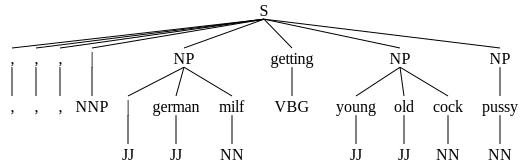

In [ ]:
!pip install svgling
import svgling

#errors are due to tkinter because it is trying to display the tree . # No funciona porque detecta simbolos !?!-~#@ Cuando no halla funcionara bien
'''
chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
chunkParser = nltk.RegexpParser(chunkGram)
for tweet in df['POS']:
  #print(tweet)
  result = chunkParser.parse(tweet)
  #svgling.draw_tree(result)
'''

#sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
sentence = df['POS'][900]
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
svgling.draw_tree(result)
